In [45]:
import json
from flask import Response
from flask import Flask, render_template, request
import pickle
import flask
import os
import sqlite3
from IPython.core.display import JSON
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from transformer import get_lat, get_lng, remove_after_dot, scientific_notation_9_kelurahan_id_to_int, split_date_process_end, split_date_process_start

base_oltp = "./assets/oltp"



In [72]:

# ### Dimensi Kategori
dim_kategori = pd.read_excel(
    f"{base_oltp}/master_kategori.xlsx").set_index('category_id')
dim_kategori['category_is_food'] = dim_kategori['category_is_food'] == 1
dim_kategori['category_name'].to_list()

['CAFE', 'JAJANAN', 'RESTAURANT', 'TOKO/SWALAYAN', 'WARUNG MAKAN']

In [47]:

# ### Dimensi Driver
dim_driver = pd.read_excel(
    f"{base_oltp}/master_driver.xlsx").set_index('user_id')
dim_driver['user_gender'] = dim_driver['user_gender'] == 'L'
dim_driver = dim_driver.rename(columns={'user_gender': 'is_male'})
dim_driver

,user_name,user_email,user_birthdate,is_male,user_address,user_lat,user_lng,kelurahan_id,kelurahan_name,kecamatan_name,fleet_id,fleet_merk,fleet_type
user_id,,,,,,,,,,,,,
108,Ana Maimunah Pertiwi S.H.,ana_maimunah_pertiwi_s_h_@gmail.com,1991-12-21,False,"Jl. Pak Benceng No.C7, Sungai Bangkong",-0.052168,109.306711,6171010003,BENUA MELAYU DARAT,PONTIANAK SELATAN,8,Toyota,MOBIL
87,Artanto Eman Wacana S.I.Kom,artanto_eman_wacana_s_i_kom@yahoo.co.id,1983-05-25,True,"Gang Ramin 5 No.76, Tj. Hulu",-0.029319,109.370956,6171020001,PARIT MAYOR,PONTIANAK TIMUR,1,Honda,MOTOR
75,Atma Dasa Uwais,atma_dasa_uwais@gmail.co.id,1985-12-28,True,"Gang Madani, Pal IX",-0.067330,109.297329,6171011001,BANGKA BELITUNG LAUT,PONTIANAK TENGGARA,6,TVS,MOTOR
96,Bakda Gunawan,bakda_gunawan@yahoo.co.id,1995-05-26,True,"Gang Melati 2, Sungai Beliung",-0.008973,109.292455,6171040001,BATU LAYANG,PONTIANAK UTARA,17,KIA,MOBIL
95,Cengkal Marpaung,cengkal_marpaung@yahoo.co.id,1994-12-09,True,"Jl. Padat Karya, Saigon",-0.043819,109.377378,6171020004,TANJUNG HULU,PONTIANAK TIMUR,1,Honda,MOBIL
86,Daliono Firgantoro,daliono_firgantoro@gmail.com,1995-12-01,True,"Jl. Perdana, Parit Tokaya",-0.073419,109.334419,6171010006,KOTA BARU,PONTIANAK SELATAN,1,Honda,MOTOR
92,Danu Januar,danu_januar@gmail.co.id,1977-04-03,True,"Pal IX, Kakap River",-0.061224,109.270484,6171011002,BANGKA BELITUNG DARAT,PONTIANAK TENGGARA,2,Yamaha,MOTOR
89,Dirja Mansur,dirja_mansur@gmail.co.id,1987-12-02,True,"masjid mujahid, Jl. Putri Candramidi",-0.037534,109.326459,6171031001,SUNGAI BANGKONG,PONTIANAK KOTA,4,Suzuki,MOTOR
103,Eka Tira Haryanti,eka_tira_haryanti@yahoo.co.id,1994-11-21,False,"Pal IX, Kakap River",-0.062174,109.271238,6171011003,BANSIR LAUT,PONTIANAK TENGGARA,7,BMW,MOTOR


In [48]:

# ### Dimensi Kelurahan
dim_kelurahan = pd.read_excel(
    f"{base_oltp}/master_kelurahan.xlsx").set_index('kelurahan_id')

dim_merchant = pd.read_excel(f"{base_oltp}/master_merchant.xlsx").astype(
    {'kelurahan_id': 'str'}).set_index('merchant_id')
dim_merchant['kelurahan_id'] = dim_merchant['kelurahan_id'].apply(
    remove_after_dot)
# TODO: Hapus nan
dim_merchant

,category_id,merchant_name,merchant_address,merchant_address_lat,merchant_address_lng,kelurahan_id,kelurahan_name,kecamatan_name
merchant_id,,,,,,,,
266,4,Bakso 77,"Jalan Mitra Indah Utama 8, Kalimantan Barat 78...",-0.088364,109.349154,nan,NaN,NaN
106,3,KFC SERDAM,"Komp. Lestari 2, Sungai Raya, Kabupaten Kubu R...",-0.077896,109.35664,nan,NaN,NaN
286,2,Warung Kopi & Kuliner Nusantara,Jl. Sei. Raya Dalam No. 29,-0.026330,109.342504,nan,NaN,NaN
20,4,Pondok Rasa,"Jl. Purnama I No.7, Akcaya, Pontianak Sel., Ko...",-0.050195,109.334,6171030001,PAL LIMA,PONTIANAK BARAT
418,1,Indomaret Jalan karet,Jl Karet,-0.009802,109.295136,6171030008,SUNGAI BELIUNG,PONTIANAK BARAT
...,...,...,...,...,...,...,...,...
261,4,Rumah Makan Karunia,"Jl. Sepakat II No.2, Bansir Darat, Pontianak T...",-0.061266,109.349946,6171011004,BANSIR DARAT,PONTIANAK TENGGARA
424,1,Alfamart Imam Bonjol,Jl Imam Bonjol,-0.039971,109.345044,6171011003,BANSIR LAUT,PONTIANAK TENGGARA
425,1,Indomaret Siantan Hilir,Jl Gusti Situt Mahmud,-0.013708,109.336138,6171040002,SIANTAN HILIR,PONTIANAK UTARA


In [49]:

# ### Dimensi User
dim_user = pd.read_excel(f"{base_oltp}/master_user.xlsx").set_index('user_id')
dim_user['user_gender'] = dim_user['user_gender'] == 'L'
dim_user = dim_user.rename(columns={'user_gender': 'is_male'})
dim_user

,user_name,user_email,user_birthdate,is_male,user_address,user_lat,user_lng,kelurahan_id,kelurahan_name,kecamatan_name
user_id,,,,,,,,,,
47,Aisyah Farida,aisyah_farida@gmail.co.id,2003-10-28,False,"Jalur Cinday, Batu Layang",0.010186,109.313097,6171030001,PAL LIMA,PONTIANAK BARAT
55,Ajimin Aditya Pangestu,ajimin_aditya_pangestu@gmail.com,2004-04-22,True,"Unnamed Road, Sungai Beliung",-0.001745,109.293638,6171030007,SUNGAI JAWI LUAR,PONTIANAK BARAT
11,Anita Mardhiyah,anita_mardhiyah@yahoo.com,2002-03-13,False,"jln puskesmas gg sejati 2, Sungai Jawi",-0.025152,109.305623,6171030007,SUNGAI JAWI LUAR,PONTIANAK BARAT
8,Argono Daru Tarihoran S.Sos,argono_daru_tarihoran_s_sos@gmail.co.id,1987-02-08,True,"Jalan Bina Jaya, Kota Baru",-0.064516,109.310146,6171031004,MARIANA,PONTIANAK KOTA
51,Artawan Pranowo,artawan_pranowo@yahoo.com,1991-05-07,True,"Jl. Tabrani Ahmad No.50, Sungai Jawi Dalam",-0.021350,109.300646,6171011004,BANSIR DARAT,PONTIANAK TENGGARA
...,...,...,...,...,...,...,...,...,...,...
10,Warta Pranowo,warta_pranowo@gmail.co.id,1989-05-30,True,"Gg. Selamat 3 No.17, Sungai Jawi Dalam",-0.018620,109.321530,6171031001,SUNGAI BANGKONG,PONTIANAK KOTA
65,Wisnu Mandala,wisnu_mandala@gmail.co.id,2001-07-28,True,"Jl. Dharma Putra No.19, Siantan Hilir",-0.002717,109.342878,6171040001,BATU LAYANG,PONTIANAK UTARA
41,Yance Riyanti,yance_riyanti@yahoo.com,2000-08-25,False,"Gg. Nurul Muslimin, Siantan Tengah",-0.011712,109.352202,6171031001,SUNGAI BANGKONG,PONTIANAK KOTA


In [50]:

con = sqlite3.connect(f"{base_oltp}/dummy_ojol_transactions_raw_only.sqlite")
fact_transaction = pd.read_sql_query(
    f"SELECT * FROM dummy_ojol_transactions_raw_only_query_get_transaction_list_koto", con)
fact_transaction = fact_transaction.set_index('id')


date_start = fact_transaction.apply(
    lambda row: split_date_process_start(row), axis=1)
fact_transaction['date_start'] = pd.to_datetime(date_start)
date_end = fact_transaction.apply(
    lambda row: split_date_process_end(row), axis=1)
fact_transaction['date_end'] = pd.to_datetime(date_end)

# Ubah notasi science di kolom kelurahanid menjadi int64
fact_transaction['from_kelurahanid'] = fact_transaction['from_kelurahanid'].apply(
    scientific_notation_9_kelurahan_id_to_int)
fact_transaction['to_kelurahanid'] = fact_transaction['to_kelurahanid'].apply(
    scientific_notation_9_kelurahan_id_to_int)

# Split latlng from dan to


fact_transaction['transaction_from_lat'] = fact_transaction['transaction_from_latlng'].apply(
    get_lat).astype(float)
fact_transaction['transaction_from_lng'] = fact_transaction['transaction_from_latlng'].apply(
    get_lng).astype(float)
fact_transaction['transaction_to_lat'] = fact_transaction['transaction_to_latlng'].apply(
    get_lat).astype(float)
fact_transaction['transaction_to_lng'] = fact_transaction['transaction_to_latlng'].apply(
    get_lng).astype(float)

# Banyak ada yang formatnya tidak bener misal transaction_from_latlng "-0.03844709999999999,109.3272303 \t\t\t\t\t\t\..."
fact_transaction.loc[fact_transaction['transaction_from_latlng'].str.contains(
    "\t")]

fact_transaction = fact_transaction.drop('date_process', axis=1)
fact_transaction = fact_transaction.drop('transaction_from_latlng', axis=1)
fact_transaction = fact_transaction.drop('transaction_to_latlng', axis=1)
fact_transaction

,mode,from_alamat,from_kelurahanid,to_alamat,to_kelurahanid,distance,amount_delivery,amount_merchant,transaction_amount_total,customer_id,driver_id,merchant_id,date_start,date_end,transaction_from_lat,transaction_from_lng,transaction_to_lat,transaction_to_lng
id,,,,,,,,,,,,,,,,,,
1617.0,BIKE,"Gang Ikhwan No.16, Sungai Jawi",6171031002,"Jl. Prof. M.Yamin No.3a, Sungai Bangkong",6171010002,5.55,2500.0,0.0,2500.0,67.0,90.0,,2019-03-09 20:45:00,2019-03-09 22:05:00,-0.030328,109.297753,-0.061345,109.305406
1297.0,FOOD,"Neo Shabu-Shabu Steak & Shake, Johar, Jl. Joha...",6171031001,"Jl. Dare Nandong Villa Ria Indah, Tj. Hulu",6171020002,7.08,9000.0,82000.0,91000.0,55.0,77.0,93.0,2019-03-09 19:55:00,2019-03-10 01:38:00,-0.028610,109.329253,-0.028571,109.374953
1394.0,SHOP,"Alfamart Pontianak Mall, Jl Teuku Umar",6171031002,"Gg. Gn. Malabar No.21, Sungai Jawi",6171030008,4.02,5000.0,58500.0,63500.0,68.0,75.0,421.0,2019-03-09 19:54:00,2019-03-09 21:44:00,-0.030186,109.335633,-0.022623,109.319152
1120.0,FOOD,"Parklife, Jl. Karimata No.64, Sungai Bangkong,...",6171031004,"Unnamed Road, Pal IX",6171011002,8.94,12000.0,72000.0,84000.0,8.0,82.0,109.0,2019-03-09 18:56:00,2019-03-10 00:20:00,-0.030581,109.326401,-0.063780,109.273496
2053.0,CAR,"Jl. Tabrani Ahmad No.12, Sungai Jawi Dalam",6171030001,"Pal IX, Kakap River",6171011003,7.93,14400.0,0.0,14400.0,19.0,109.0,,2019-03-09 12:28:00,2019-03-09 17:11:00,-0.018462,109.307568,-0.059239,109.273129
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1242.0,FOOD,"Pondok Ale-ale, Gg. Suka Damai No.21, Sungai B...",6171031001,"Jl. Swadaya, Pal IX",6171011001,7.26,9000.0,59000.0,68000.0,71.0,93.0,16.0,2018-09-10 14:27:00,2018-09-10 16:43:00,-0.037180,109.325818,-0.057694,109.283237
2911.0,CAR,"Jl. Tani, Saigon",6171020004,"Gang Hidayah, Pal Lima",6171031003,10.45,18000.0,0.0,18000.0,19.0,99.0,,2018-09-10 13:12:00,2018-09-10 17:22:00,-0.035183,109.371125,-0.031017,109.295263
1779.0,BIKE,"Gg. Dharma Putra 17A, Siantan Hilir",6171040003,"Gg. Losari No.16, Sungai Jawi",6171030007,7.5,3500.0,0.0,3500.0,53.0,80.0,,2018-09-10 10:30:00,2018-09-10 16:55:00,-0.003776,109.345834,-0.027845,109.302605


In [89]:
sort_quarterly = fact_transaction.groupby(
    fact_transaction['date_start'].dt.to_period('Q'))
simplify = {}
for key, it in sort_quarterly:
    simplify[str(key)] = it
# simplify

fact_transaction.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1878 entries, 1617.0 to 2133.0
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   mode                      1878 non-null   object        
 1   from_alamat               1878 non-null   object        
 2   from_kelurahanid          1878 non-null   int64         
 3   to_alamat                 1878 non-null   object        
 4   to_kelurahanid            1878 non-null   int64         
 5   distance                  1878 non-null   object        
 6   amount_delivery           1878 non-null   object        
 7   amount_merchant           1878 non-null   object        
 8   transaction_amount_total  1878 non-null   object        
 9   customer_id               1878 non-null   object        
 10  driver_id                 1878 non-null   object        
 11  merchant_id               1878 non-null   object        
 12  date_start        

(array([1866.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          12.]),
 array([  2.,  78., 154., 230., 306., 382., 458., 534., 610., 686., 762.]),
 <BarContainer object of 10 artists>)

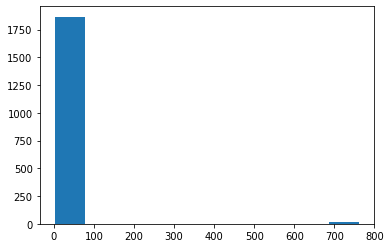

In [70]:
def get_rounded_dist(cell):
    s = int(float(cell))
    return s

import matplotlib.pyplot as plt

fact_transaction['distance_rounded'] = fact_transaction['distance'].apply(get_rounded_dist)
    
plt.hist(fact_transaction['distance_rounded'])

In [28]:
fact_transaction['distance_rounded']

id
1617.0     5
1297.0     7
1394.0     4
1120.0     8
2053.0     7
          ..
1242.0     7
2911.0    10
1779.0     7
1228.0     7
2133.0     6
Name: distance_rounded, Length: 1878, dtype: int64

In [82]:
sort_mode = fact_transaction.groupby(
    fact_transaction['mode'])
simplify_mode = {}
for key, it in sort_mode:
    simplify_mode[str(key)] = it

In [83]:
simplify_mode.keys()

dict_keys(['BIKE', 'CAR', 'FOOD', 'SHOP'])

NameError: name 'BytesIO' is not defined

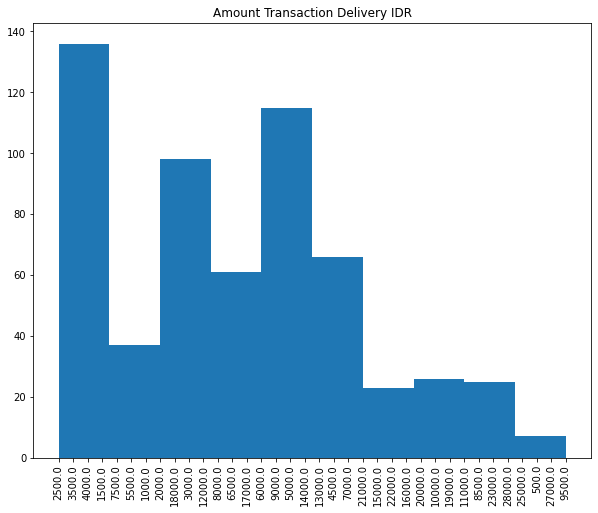

In [87]:
q="BIKE"
# Amount Transaction Delivery
plt.figure(figsize=(10, 8))
plt.title("Amount Transaction Delivery IDR")
plt.xticks(rotation=90)
plt.hist(simplify_mode[q]['amount_delivery'].to_list())
tmpfile = BytesIO()
plt.savefig(tmpfile, format='png')
graph_amount_trans = base64.b64encode(tmpfile.getvalue()).decode('utf-8')

NameError: name 'BytesIO' is not defined

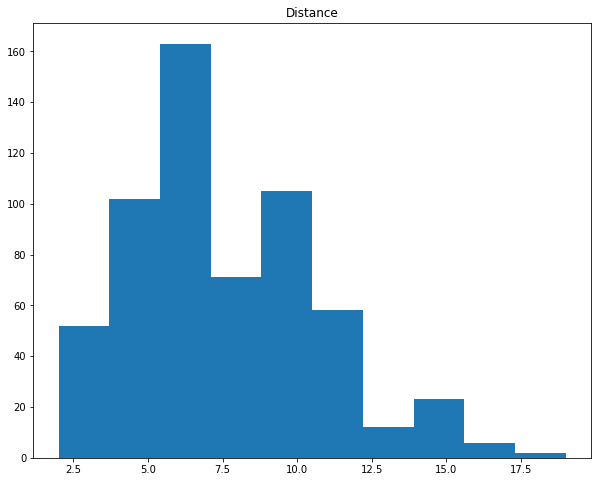

In [88]:

# Distance Histogram Rounded
plt.figure(figsize=(10, 8))
plt.title("Distance")
# plt.xticks(rotation=90)
plt.hist(simplify_mode[q]['distance_rounded'].to_list())
tmpfile = BytesIO()
plt.savefig(tmpfile, format='png')
graph_per_distance_rounded = base64.b64encode(tmpfile.getvalue()).decode('utf-8')


In [93]:
simplify_mode[q]['date_start'].dt.hour

id
1617.0    20
1574.0    18
1882.0    18
1671.0    16
1847.0    15
          ..
1812.0    19
2642.0    18
1639.0    18
2643.0    16
1779.0    10
Name: date_start, Length: 594, dtype: int64

(array([1.868e+03, 0.000e+00, 2.000e+00, 1.000e+00, 2.000e+00, 1.000e+00,
        2.000e+00, 0.000e+00, 1.000e+00, 1.000e+00]),
 array([    0.,  3016.,  6032.,  9048., 12064., 15080., 18096., 21112.,
        24128., 27144., 30160.]),
 <BarContainer object of 10 artists>)

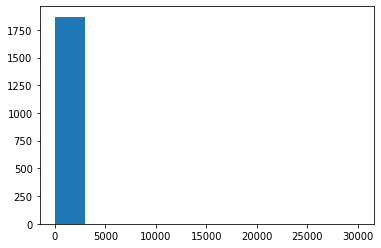

In [131]:
def second_to_minute(cell):
    return cell / 60
fact_transaction['duration'] = fact_transaction['date_end'] - fact_transaction['date_start']
fact_transaction['duration'] = fact_transaction['duration'].dt.total_seconds()
fact_transaction['duration'] = fact_transaction['duration'].apply(second_to_minute).astype(int)
plt.hist(fact_transaction['duration'].to_list())

<AxesSubplot:>

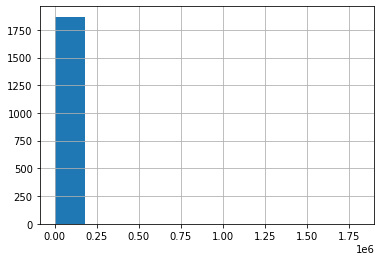

In [130]:
fact_transaction['duration'].hist()

<AxesSubplot:>

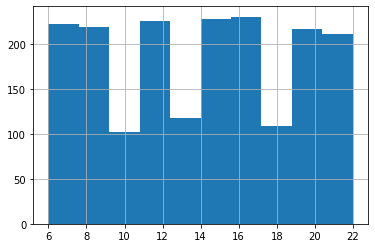

In [135]:
fact_transaction['date_start'].dt.hour.hist()